In [2]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
data=pd.read_csv('C:\\Users\\Laxminarayana\\Downloads\\book.csv')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
589,0.0125,"(CookBks, ItalArt, RefBks, ItalCook, ItalAtlas..."
590,0.0145,"(CookBks, RefBks, YouthBks, GeogBks, DoItYBks,..."
591,0.0105,"(CookBks, ItalArt, ItalCook, GeogBks, DoItYBks..."
592,0.0100,"(CookBks, ItalArt, RefBks, ItalCook, GeogBks, ..."


In [6]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(GeogBks, CookBks, DoItYBks, YouthBks)",4
96,0.0560,"(ArtBks, CookBks, GeogBks, YouthBks)",4
97,0.0650,"(ArtBks, CookBks, GeogBks, DoItYBks)",4
98,0.0510,"(CookBks, YouthBks, GeogBks, DoItYBks, ChildBks)",5


In [7]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.05)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


# getting th item sets with length = 1,2,3,4 and support more han 50%

In [8]:
a=frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.05) ]
a

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1


In [9]:
b=frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]
b

,support,itemsets,length
9,0.1650,"(YouthBks, ChildBks)",2
10,0.2560,"(CookBks, ChildBks)",2
11,0.1840,"(DoItYBks, ChildBks)",2
12,0.1515,"(RefBks, ChildBks)",2
13,0.1625,"(ArtBks, ChildBks)",2
14,0.1950,"(GeogBks, ChildBks)",2
15,0.0850,"(ItalCook, ChildBks)",2
16,0.1620,"(CookBks, YouthBks)",2
17,0.1155,"(DoItYBks, YouthBks)",2
18,0.0965,"(RefBks, YouthBks)",2


In [10]:
c=frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.05) ]
c

,support,itemsets,length
36,0.1290,"(YouthBks, CookBks, ChildBks)",3
37,0.0950,"(YouthBks, DoItYBks, ChildBks)",3
38,0.0830,"(YouthBks, RefBks, ChildBks)",3
39,0.0805,"(ArtBks, YouthBks, ChildBks)",3
40,0.0990,"(YouthBks, GeogBks, ChildBks)",3
41,0.1460,"(CookBks, DoItYBks, ChildBks)",3
42,0.1225,"(CookBks, RefBks, ChildBks)",3
43,0.1265,"(ArtBks, CookBks, ChildBks)",3
44,0.1495,"(GeogBks, CookBks, ChildBks)",3
45,0.0850,"(ItalCook, CookBks, ChildBks)",3


In [11]:
d=frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.05) ]
d

,support,itemsets,length
76,0.0820,"(YouthBks, CookBks, DoItYBks, ChildBks)",4
77,0.0680,"(YouthBks, CookBks, RefBks, ChildBks)",4
78,0.0670,"(ArtBks, YouthBks, CookBks, ChildBks)",4
79,0.0830,"(GeogBks, YouthBks, CookBks, ChildBks)",4
80,0.0530,"(YouthBks, RefBks, DoItYBks, ChildBks)",4
81,0.0510,"(ArtBks, YouthBks, DoItYBks, ChildBks)",4
82,0.0565,"(YouthBks, GeogBks, DoItYBks, ChildBks)",4
83,0.0515,"(YouthBks, GeogBks, RefBks, ChildBks)",4
84,0.0550,"(ArtBks, YouthBks, GeogBks, ChildBks)",4
85,0.0745,"(CookBks, RefBks, DoItYBks, ChildBks)",4


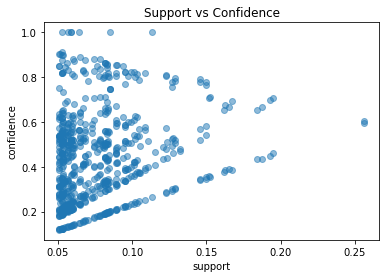

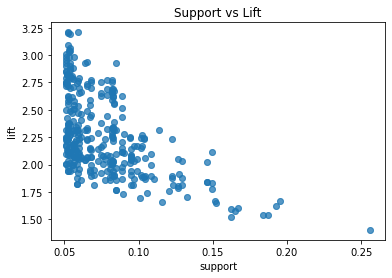

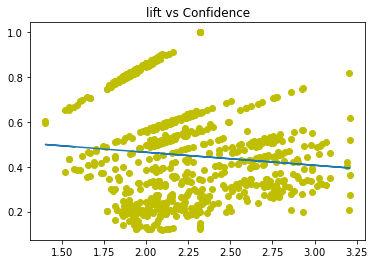

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# There are 9 Itemsets with 1 antacidents about 50% support

##There are 27 Itemsets with 2 antacidents about 50% support
There are 40 Itemsets with 3 antacidents about 50% support¶
There are 23 Itemsets with 4 antacidents about 50% support ,with 652 rules